In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
data_train=pd.read_csv(r'D:\Bharath Intern DataScience\Task 2 Titanic\Titanic-Classification-main\train.csv')
data_test=pd.read_csv(r'D:\Bharath Intern DataScience\Task 2 Titanic\Titanic-Classification-main\test.csv')
data_gender_submission=pd.read_csv(r'D:\Bharath Intern DataScience\Task 2 Titanic\Titanic-Classification-main\gender.csv')
combine=[data_train,data_test]

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.dtypes

In [14]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df =data_train.info()
print()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass 

In [16]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


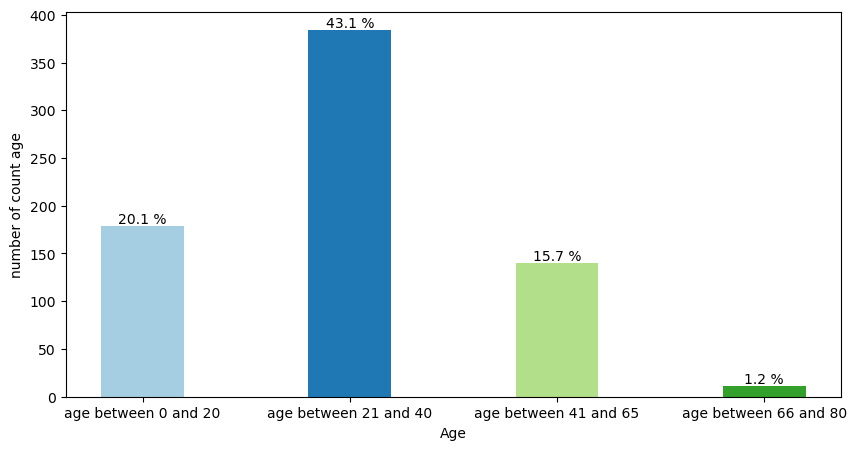

In [18]:
 range0_20=[]
range21_40=[]
range41_65=[]
range66_80=[]
for age,age_df in data_train.groupby('Age'):
   for n_age in age_df.groupby('Age')['Age'].count():
    if (age >=0 and age <=20):
       range0_20.append(n_age)
    elif ( age >=21 and age <=40):
       range21_40.append(n_age)
    elif ( age >=41 and age <=65):
       range41_65.append(n_age)
    else:
       range66_80.append(n_age)
y=[sum(range0_20),sum(range21_40),sum(range41_65),sum(range66_80)]
x=['age between 0 and 20','age between 21 and 40','age between 41 and 65','age between 66 and 80']
col_map = plt.get_cmap('Paired')

plt.figure(figsize = (10, 5))
plt.bar(x,y, color =col_map.colors,width = 0.4)
plt.xlabel('Age')
plt.ylabel('number of count age')
for i in range(len(y)):
    plt.text(i,y[i],"{} %".format(round(y[i]*100/891,1)),ha='center',va='bottom')
plt.show()

[608 283]


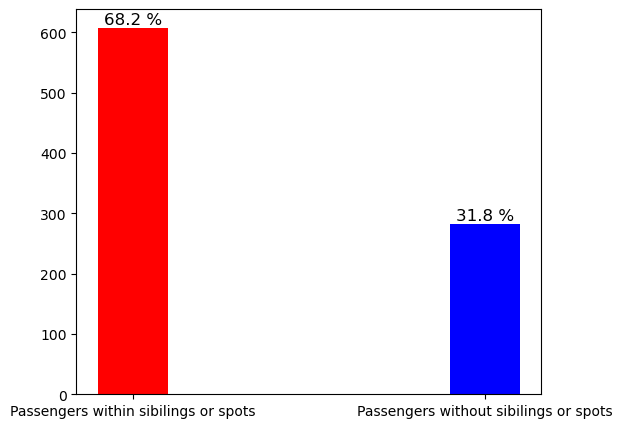

In [19]:
x=['Passengers within sibilings or spots' ,'Passengers without sibilings or spots']
y= (data_train['SibSp'].apply(lambda x:x !=0)).value_counts().values
plt.figure(figsize = (6, 5))
print(y)
c=['red', 'blue']
plt.bar(x,y,color=c,width=0.2)
for i in range(len(y)):
    plt.text(i,y[i],"{} %".format(round(y[i]*100/891,1)),ha='center',va='bottom',fontsize=12)
plt.show()

In [20]:
data_train.groupby(['Pclass'])['PassengerId'].sum()

Pclass
1     99705
2     82056
3    215625
Name: PassengerId, dtype: int64

In [21]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [22]:
data_train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [23]:
data_train[['Embarked','Pclass','Sex','Survived']].groupby(['Embarked','Pclass','Sex']).mean().sort_values(by='Survived', ascending=False)

Survived
Embarked Pclass Sex             
C        2      female  1.000000
Q        1      female  1.000000
         2      female  1.000000
C        1      female  0.976744
S        1      female  0.958333
         2      female  0.910448
Q        3      female  0.727273
C        3      female  0.652174
         1      male    0.404762
S        3      female  0.375000
         1      male    0.354430
C        3      male    0.232558
         2      male    0.200000
S        2      male    0.154639
         3      male    0.128302
Q        3      male    0.076923
         1      male    0.000000
         2      male    0.000000

In [24]:
data_train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived' ,ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [25]:
data_train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived' ,ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [26]:
data_train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived' ,ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


c:\Users\geeth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


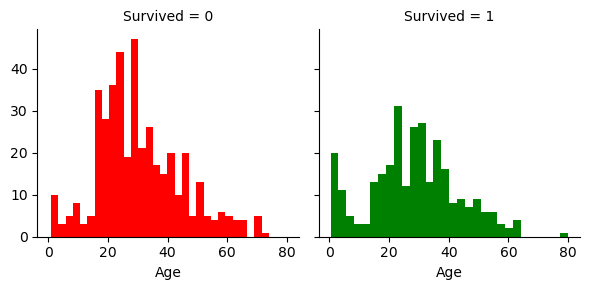

In [27]:
g = sns.FacetGrid(data_train, col='Survived',hue_kws={'color': ['r', 'g']}, hue="Survived")
g.map(plt.hist,'Age',bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

c:\Users\geeth\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


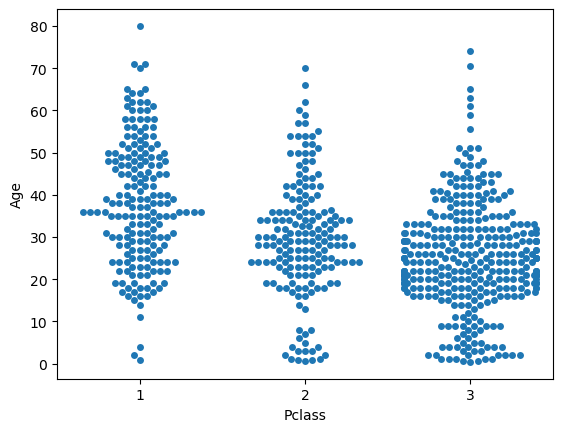

In [28]:
sns.swarmplot(x='Pclass',y='Age',data=data_train)

c:\Users\geeth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


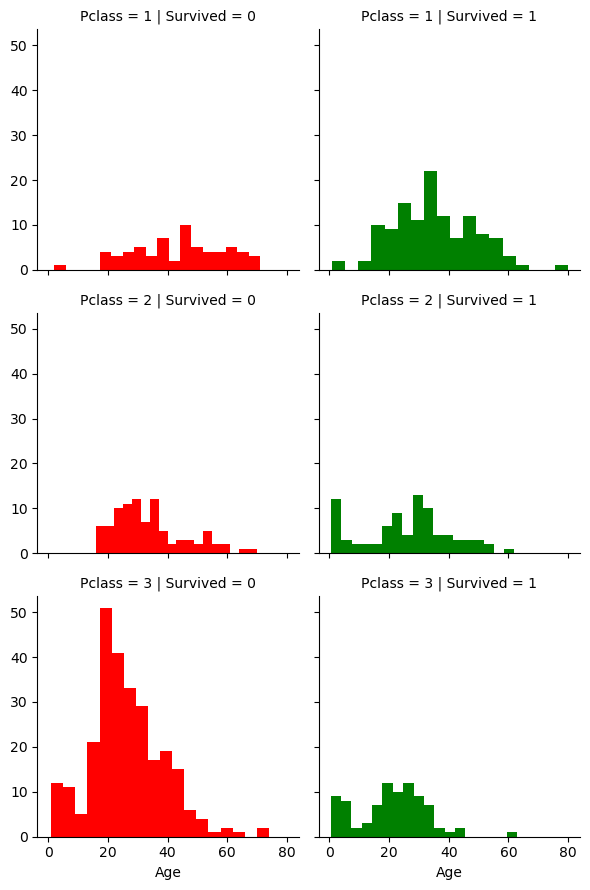

In [29]:
g=sns.FacetGrid(data_train,col='Survived',row='Pclass',hue_kws={'color': ['r', 'g']}, hue="Survived")
g.map(plt.hist,'Age',bins=18)

c:\Users\geeth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\geeth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\geeth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


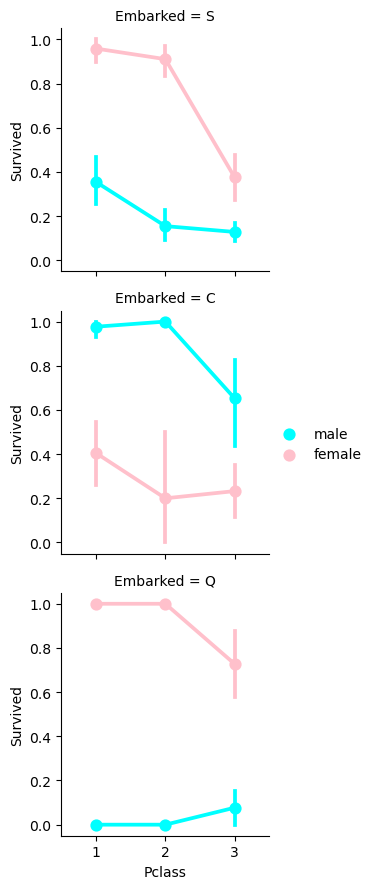

In [30]:
grid=sns.FacetGrid(data_train,row='Embarked')
grid.map(sns.pointplot,'Pclass' ,'Survived','Sex',palette=sns.color_palette(['cyan', 'pink'])).add_legend()
plt.show()

In [31]:
print("before" ,data_train.shape ,data_test.shape,combine[0].shape,combine[1].shape)
data_train=data_train.drop(['Cabin','Ticket'],axis=1)
data_test=data_test.drop(['Cabin','Ticket'],axis=1)
combine=[data_train,data_test]
print("after" ,data_train.shape ,data_test.shape,combine[0].shape,combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)
after (891, 10) (418, 9) (891, 10) (418, 9)


In [32]:
for dataset in combine:
    dataset['Tital']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [33]:
pd.crosstab([data_train['Tital'],data_train['Sex']],data_train['Survived'])

Survived           0    1
Tital    Sex             
Capt     male      1    0
Col      male      1    1
Countess female    0    1
Don      male      1    0
Dr       female    0    1
         male      4    2
Jonkheer male      1    0
Lady     female    0    1
Major    male      1    1
Master   male     17   23
Miss     female   55  127
Mlle     female    0    2
Mme      female    0    1
Mr       male    436   81
Mrs      female   26   99
Ms       female    0    1
Rev      male      6    0
Sir      male      0    1

In [34]:
data_train[data_train['Tital'] == 'Capt']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Tital
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0,S,Capt


In [35]:
data_train[data_train['Tital'] == 'Dr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Tital
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,90.0000,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,14.0000,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,10.5000,S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,30.5000,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,133.6500,S,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,39.6000,C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,25.9292,S,Dr


In [36]:
for dataset in combine:
    dataset['Tital']=dataset['Tital'].replace(['Capt','Lady','Sir','Dr','Rev','Jonkheer','Major','Don','Countess','Col'],'Rare')
    dataset['Tital']= dataset['Tital'].replace('Mlle','Miss')
    dataset['Tital']= dataset['Tital'].replace('Ms','Miss')
    dataset['Tital']= dataset['Tital'].replace('Mme','Mrs')
data_train[['Tital','Survived']].groupby('Tital').mean().sort_values(by='Survived',ascending=False)   

,Survived
Tital,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [37]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Tital']=dataset['Tital'].map(title_mapping)
    dataset['Tital']=dataset['Tital'].fillna(0)

In [38]:
print("before" ,data_train.shape ,data_test.shape,combine[0].shape,combine[1].shape)
data_train=data_train.drop(['Name', 'PassengerId'], axis=1)
data_test=data_test.drop(['Name'],axis=1)
combine=[data_train,data_test]
print("after" ,data_train.shape ,data_test.shape,combine[0].shape,combine[1].shape)

before (891, 11) (418, 10) (891, 11) (418, 10)
after (891, 9) (418, 9) (891, 9) (418, 9)


In [39]:
data_train[['Tital','Survived']].groupby(['Tital']).mean().sort_values(by='Survived',ascending=False)

,Survived
Tital,
3,0.793651
2,0.702703
4,0.575000
5,0.347826
1,0.156673


In [40]:
pd.crosstab(index=data_train.Tital,columns=data_train.Sex,values=data_train.Age, aggfunc='mean')

Sex,female,male
Tital,,
1,NaN,32.368090
2,21.845638,NaN
3,35.788991,NaN
4,NaN,4.574167
5,43.333333,45.894737


In [41]:
for dataset in combine:
    dataset.rename(columns = {'Sex':'Gender'},inplace=True)
    dataset['Gender']=dataset['Gender'].map({'female':1,'male':0})
data_train.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Tital
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


c:\Users\geeth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


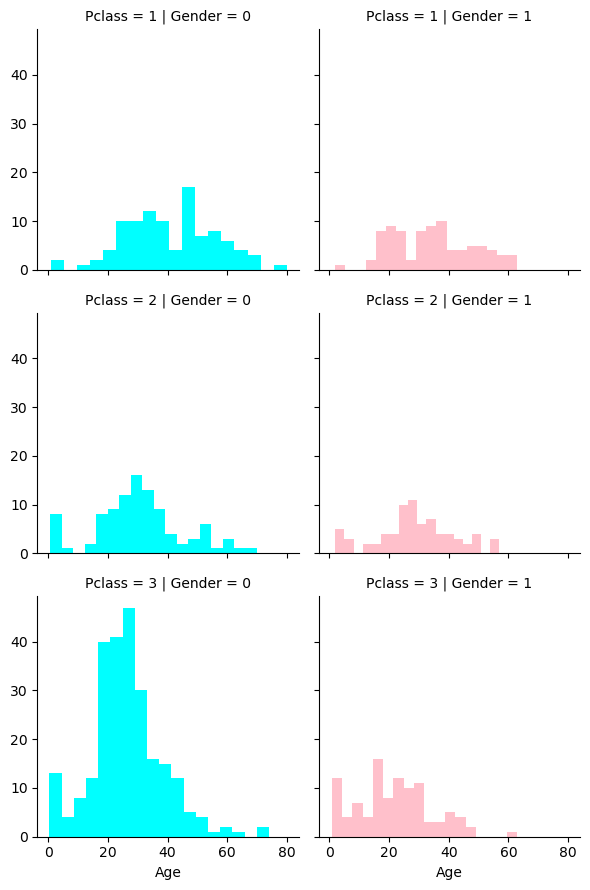

In [42]:
grid=sns.FacetGrid(data_train,row='Pclass',col='Gender',hue_kws={'color': ['cyan','pink']},hue="Gender")
grid.map(plt.hist,'Age',bins=18)

In [43]:
col_int=[col for col in data_train.columns if data_train.dtypes[col] == 'int64']
col_int

['Survived', 'Pclass', 'Gender', 'SibSp', 'Parch', 'Tital']

In [44]:
guess=np.zeros((2,3))
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            gussed_df=dataset[(dataset['Gender'] ==i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess= gussed_df.mean()
            guess[i,j]=int(age_guess)
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Gender'] == i) &(dataset['Pclass'] ==j+1),'Age']=guess[i,j]
    dataset['Age']=dataset['Age'].astype(int) 
data_train.head(30)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Tital
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
5,0,3,0,26,0,0,8.4583,Q,1
6,0,1,0,54,0,0,51.8625,S,1
7,0,3,0,2,3,1,21.0750,S,4
8,1,3,1,27,0,2,11.1333,S,3
9,1,2,1,14,1,0,30.0708,C,3


In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Tital     891 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 59.3+ KB


In [46]:
data_train['SibSp'][19]

0

In [47]:
data_train['AgeBand']=pd.cut(data_train['Age'],5)
data_train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [48]:
for dataset in combine:
    dataset.loc[dataset['Age'] < 16,'Age']=1
    dataset.loc[(dataset['Age'] >= 16 ) & (dataset['Age'] <= 32),'Age']=2
    dataset.loc[(dataset['Age']> 32) & (dataset['Age'] <=64),'Age']=3
    dataset.loc[(dataset['Age']> 64),'Age']=4

In [49]:
data_train['Age']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    2
888    2
889    2
890    2
Name: Age, Length: 891, dtype: int32

In [50]:
data_train=data_train.drop(['AgeBand'],axis=1)
combine=[data_train,data_test]

In [51]:
data_train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Parch',ascending=True)

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [52]:
for dataset in combine:
    dataset['FamilySize']=dataset['Parch']+dataset['SibSp']+1
data_train[['FamilySize','Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived',ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [53]:
data_test.head()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Tital,FamilySize
0,892,3,0,3,0,0,7.8292,Q,1.0,1
1,893,3,1,3,1,0,7.0000,S,3.0,2
2,894,2,0,3,0,0,9.6875,Q,1.0,1
3,895,3,0,2,0,0,8.6625,S,1.0,1
4,896,3,1,2,1,1,12.2875,S,3.0,3


In [54]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize'] ==1,'IsAlone']=1
data_train[['IsAlone','Survived']].groupby(['IsAlone']).mean().sort_values(by='Survived',ascending=False)

,Survived
IsAlone,
0,0.505650
1,0.303538


In [55]:
data_train=data_train.drop(['FamilySize'],axis=1)
data_test=data_test.drop(['FamilySize'],axis=1)
combine=[data_train,data_test]

In [56]:
data_train.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Tital,IsAlone
0,0,3,0,2,1,0,7.2500,S,1,0
1,1,1,1,3,1,0,71.2833,C,3,0
2,1,3,1,2,0,0,7.9250,S,2,1
3,1,1,1,3,1,0,53.1000,S,3,0
4,0,3,0,3,0,0,8.0500,S,1,1


In [57]:
freq=data_train.Embarked.dropna().mode()[0]
freq

'S'

In [58]:
for dataset in combine:
    dataset.Embarked = dataset.Embarked.fillna(freq)
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [59]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2})
#data_train.head()
data_test.head()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Tital,IsAlone
0,892,3,0,3,0,0,7.8292,2,1.0,1
1,893,3,1,3,1,0,7.0000,0,3.0,0
2,894,2,0,3,0,0,9.6875,2,1.0,1
3,895,3,0,2,0,0,8.6625,0,1.0,1
4,896,3,1,2,1,1,12.2875,0,3.0,0


In [60]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Gender       418 non-null    int64  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Tital        418 non-null    float64
 9   IsAlone      418 non-null    int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 31.2 KB


In [61]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(),inplace=True)

In [62]:
data_test.head()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Tital,IsAlone
0,892,3,0,3,0,0,7.8292,2,1.0,1
1,893,3,1,3,1,0,7.0000,0,3.0,0
2,894,2,0,3,0,0,9.6875,2,1.0,1
3,895,3,0,2,0,0,8.6625,0,1.0,1
4,896,3,1,2,1,1,12.2875,0,3.0,0


In [63]:
data_train['Fareqcut']=pd.qcut(data_train['Fare'],4)

In [64]:
data_train[['Fareqcut','Survived']].groupby(['Fareqcut'],as_index=False).mean().sort_values(by='Fareqcut',ascending=True)

,Fareqcut,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [65]:
data_test.head()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Tital,IsAlone
0,892,3,0,3,0,0,7.8292,2,1.0,1
1,893,3,1,3,1,0,7.0000,0,3.0,0
2,894,2,0,3,0,0,9.6875,2,1.0,1
3,895,3,0,2,0,0,8.6625,0,1.0,1
4,896,3,1,2,1,1,12.2875,0,3.0,0


In [66]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454 ) &  (dataset['Fare']<=31) ,'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare']=3
data_train=data_train.drop(['Fareqcut','Fare'],axis=1)
data_test = data_test.drop('Fare',axis=1)
combine=[data_train,data_test]
data_train.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked,Tital,IsAlone
0,0,3,0,2,1,0,0,1,0
1,1,1,1,3,1,0,1,3,0
2,1,3,1,2,0,0,0,2,1
3,1,1,1,3,1,0,0,3,0
4,0,3,0,3,0,0,0,1,1


In [67]:
X_train = data_train.drop('Survived',axis=1)
Y_train = data_train['Survived']
X_test = data_test.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

In [68]:
data_test.head()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Embarked,Tital,IsAlone
0,892,3,0,3,0,0,2,1.0,1
1,893,3,1,3,1,0,0,3.0,0
2,894,2,0,3,0,0,2,1.0,1
3,895,3,0,2,0,0,0,1.0,1
4,896,3,1,2,1,1,0,3.0,0


In [69]:
#logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.82

In [70]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

In [71]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.53

In [72]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.53

In [73]:
models =pd.DataFrame({
    'Model':['logistic Regression','Support Vector Machines','Decision Tree'],
    'score':[acc_log ,acc_svc,acc_decision_tree]
})

In [74]:
models.sort_values('score',ascending=False).reset_index(drop=True)

,Model,score
0,Decision Tree,86.53
1,Support Vector Machines,83.28
2,logistic Regression,81.82


In [75]:
sumbission =pd.DataFrame({
    'PassengerId':data_test['PassengerId'],
    'Survived' :Y_pred
})

In [76]:
sumbission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
